## **Setup**

In [ ]:
from google.colab import drive
mount_path = '/content/gdrive/'
drive.mount(mount_path)

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

#hide
!pip install utils
from utils import *

     |████████████████████████████████| 10.5MB 6.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.1 which is incompatible.


In [ ]:
from fastai.vision.all import *

In [ ]:
import os
import shutil
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pytz
from zipfile import ZipFile
from tempfile import TemporaryDirectory
from PIL import Image

from sklearn.metrics import f1_score, accuracy_score

# plot options
# plt.rcParams.update({'font.size': 11})
plt.style.use('fivethirtyeight')

In [ ]:
# Set and test path to competition data files
competition_path = 'My Drive/AI For Good - AI Blitz 3/Sudoku/Data/'
model_path='My Drive/AI For Good - AI Blitz 3/Sudoku/Models/'
filename = 'train.tar.gz'
assert(os.path.exists(f'{mount_path}/{competition_path}/{filename}'))
print('Drive mounted correctly and data accessible')

Drive mounted correctly and data accessible


In [ ]:
home_dir='/content/All_Data/'

# All_Data is the home directory for the images, from which training and validation splits will be taken
if not os.path.exists(home_dir):
  os.mkdir(home_dir)

  with ZipFile(f'{mount_path}/{competition_path}/GeneratedNumImgs.zip', 'r') as zip_ref:
        zip_ref.extractall(home_dir)

In [ ]:
dls = ImageDataLoaders.from_folder('/content/All_Data/GeneratedNumImgs/',valid_pct=0.001,
                                   batch_tfms=aug_transforms(do_flip=False, flip_vert=False, max_rotate=30.0,
                                                          min_zoom=.8, max_zoom=1.2, max_lighting=0.2, max_warp=0.2))

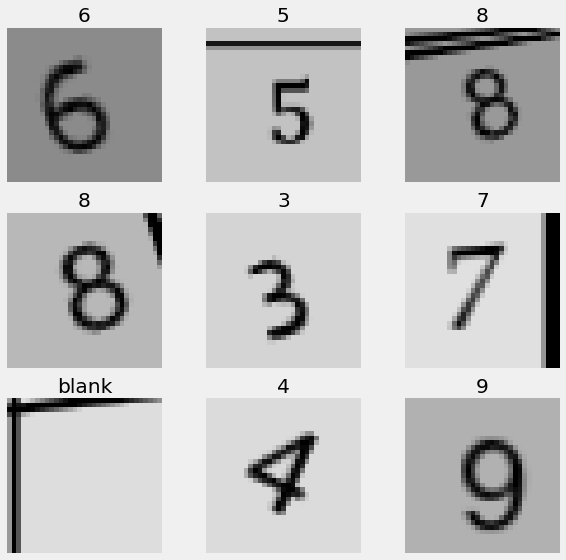

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, pretrained=False, metrics=[accuracy],cbs=[ShowGraphCallback()])
# learn.to_fp16()
# learn.tta(dl=dls, n=10)

In [ ]:
# learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,0.151388,0.109194,0.950000,01:49
1,0.029738,0.000126,1.000000,01:50
2,0.010445,0.000052,1.000000,01:52
3,0.000768,0.000000,1.000000,01:53
4,0.000142,0.000000,1.000000,01:52


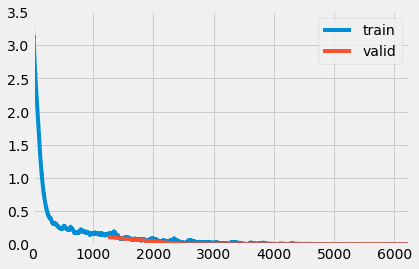

In [ ]:
learn.fit_one_cycle(n_epoch=5,lr_max=1e-2)
datestr=datetime.datetime.now(pytz.timezone('US/Eastern')).strftime("%y%m%d_%H%M")
learn.export(mount_path+model_path+datestr+'_fullgennums.pkl')

In [ ]:
# datestr=datetime.datetime.now(pytz.timezone('US/Eastern')).strftime("%y%m%d_%H%M")
# learn.export(mount_path+model_path+datestr+'_fullgennums.pkl')

In [ ]:
# datestr=datetime.datetime.now(pytz.timezone('US/Eastern')).strftime("%y%m%d_%H%M")
# learn.export(mount_path+model_path+datestr+'_fullgennums.pkl')